In [1]:
from coffea import hist
from coffea.hist.hist_tools import Interval
import coffea.processor as processor
from coffea.analysis_objects import JaggedCandidateArray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward
from uproot_methods import TLorentzVectorArray
from FireHydrant.Tools.trigger import Triggers

np.seterr(divide='ignore', invalid='ignore', over='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import json
import os
from os.path import join

dataset4mu_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/signal_4mu_v2.json')))
dataset2mu2e_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/signal_2mu2e_v2.json')))
backgrounds_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/backgrounds_v2.json')))

In [3]:
class leptonjetProcessor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat('dataset', 'dataset')
        njet_axis = hist.Bin('njet', '# leptonjet', 5, 0, 5)
        self._accumulator = processor.dict_accumulator({
            'njet': hist.Hist('Events', dataset_axis, njet_axis),
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, df):
        output = self.accumulator.identity()
        dataset = df['dataset']
        triggermask = np.logical_or.reduce([df[tp] for tp in Triggers])
        
        leptonjets = JaggedCandidateArray.candidatesfromcounts(
            df['pfjet_p4'],
            p4=TLorentzVectorArray.from_cartesian(df['pfjet_p4.fCoordinates.fX'],
                                                 df['pfjet_p4.fCoordinates.fY'],
                                                 df['pfjet_p4.fCoordinates.fZ'],
                                                 df['pfjet_p4.fCoordinates.fT']),
        )
        
        output['njet'].fill(dataset=dataset, njet=leptonjets.counts[triggermask])
        
        return output
    
    def postprocess(self, accumulator):
        return accumulator

In [4]:
dataset={
    '4mu/mXX-100_mA-5_lxy-0p3': dataset4mu_['mXX-100_mA-5_lxy-0p3'],
    '4mu/mXX-1000_mA-0p25_lxy-0p3': dataset4mu_['mXX-1000_mA-0p25_lxy-0p3'],
    '2mu2e/mXX-100_mA-5_lxy-0p3': dataset2mu2e_['mXX-100_mA-5_lxy-0p3'],
    '2mu2e/mXX-1000_mA-0p25_lxy-0p3': dataset2mu2e_['mXX-1000_mA-0p25_lxy-0p3'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:03<00:00,  6.65items/s]


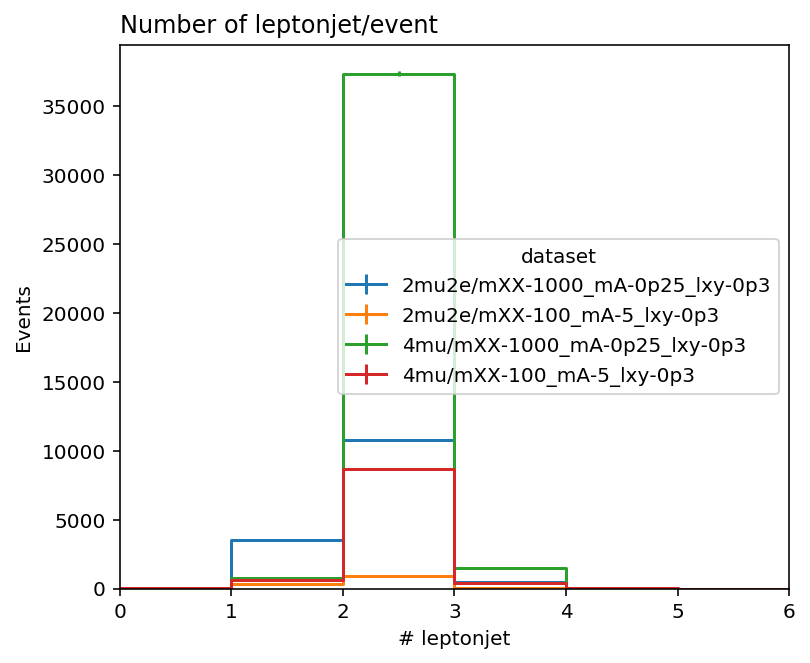

In [5]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=False)
ax.set_title('Number of leptonjet/event', x=0, ha='left');

In [6]:
dataset={
    '4mu/mXX-100_mA-5_lxy-300': dataset4mu_['mXX-100_mA-5_lxy-300'],
    '4mu/mXX-1000_mA-0p25_lxy-300': dataset4mu_['mXX-1000_mA-0p25_lxy-300'],
    '2mu2e/mXX-100_mA-5_lxy-300':dataset2mu2e_['mXX-100_mA-5_lxy-300'],
    '2mu2e/mXX-1000_mA-0p25_lxy-300': dataset2mu2e_['mXX-1000_mA-0p25_lxy-300'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:03<00:00,  6.65items/s]


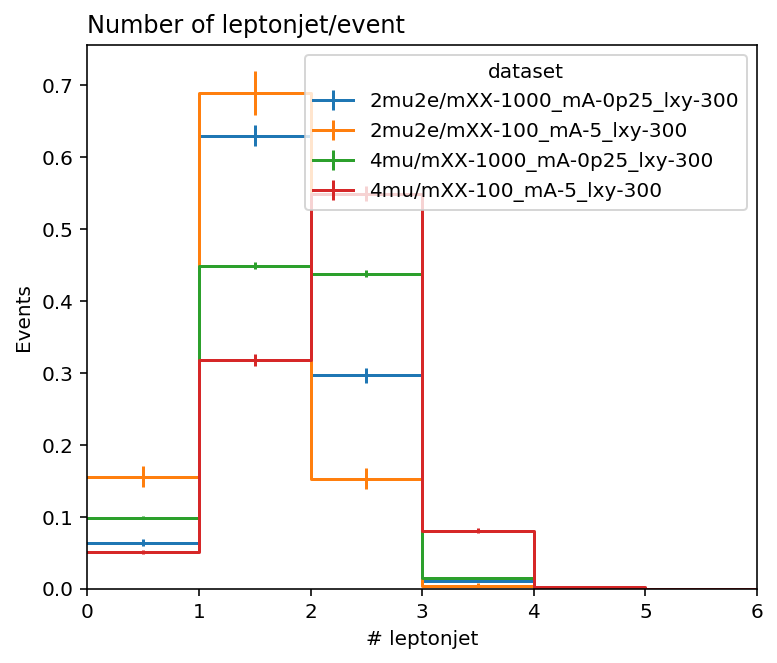

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=True)
ax.set_title('Number of leptonjet/event', x=0, ha='left');

In [10]:
dataset = backgrounds_['QCD']
output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 147/147 [00:08<00:00,  7.99items/s]


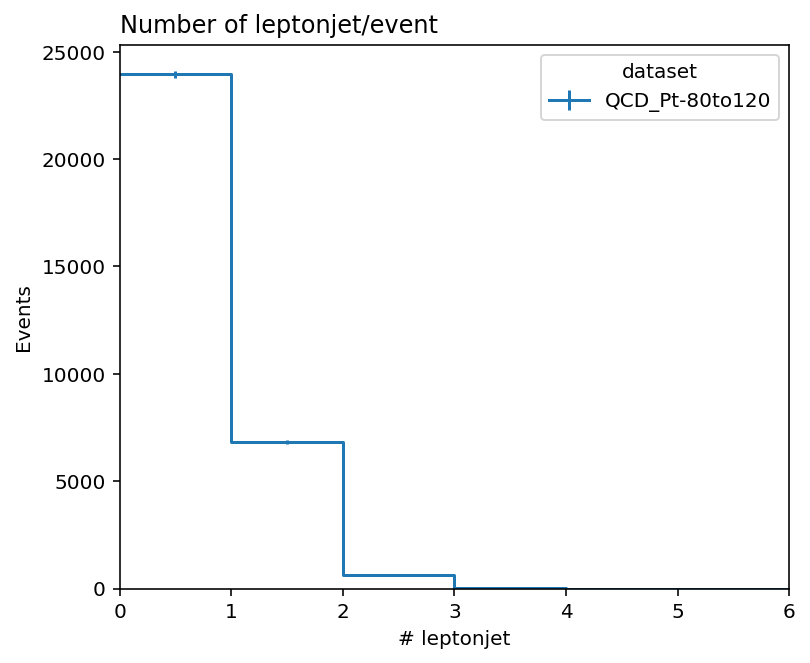

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=False)
ax.set_title('Number of leptonjet/event', x=0, ha='left');

In [12]:
vals = output['njet'].values()[('QCD_Pt-80to120',)]
vals[2]/vals.sum()

0.02038739225851595

In [13]:
vals

array([2.3952e+04, 6.8320e+03, 6.4100e+02, 1.5000e+01, 1.0000e+00])

# old samples

In [38]:
dataset4mu_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/signal_4mu.json')))
dataset2mu2e_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/signal_2mu2e.json')))
backgrounds_ = json.load(open(join(os.getenv('FH_BASE'), 'Notebooks/MC/Samples/backgrounds.json')))

In [29]:
dataset={
    '4mu/mXX-100_mA-5_lxy-0p3': dataset4mu_['mXX-100_mA-5_lxy-0p3'],
    '4mu/mXX-1000_mA-0p25_lxy-0p3': dataset4mu_['mXX-1000_mA-0p25_lxy-0p3'],
#     '4mu/mXX-100_mA-5_lxy-300': dataset4mu_['mXX-100_mA-5_lxy-300'],
#     '4mu/mXX-1000_mA-0p25_lxy-300': dataset4mu_['mXX-1000_mA-0p25_lxy-300'],
    
    '2mu2e/mXX-100_mA-5_lxy-0p3': dataset2mu2e_['mXX-100_mA-5_lxy-0p3'],
    '2mu2e/mXX-1000_mA-0p25_lxy-0p3': dataset2mu2e_['mXX-1000_mA-0p25_lxy-0p3'],
#     '2mu2e/mXX-100_mA-5_lxy-300':dataset2mu2e_['mXX-100_mA-5_lxy-300'],
#     '2mu2e/mXX-1000_mA-0p25_lxy-300': dataset2mu2e_['mXX-1000_mA-0p25_lxy-300'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:03<00:00,  1.84items/s]


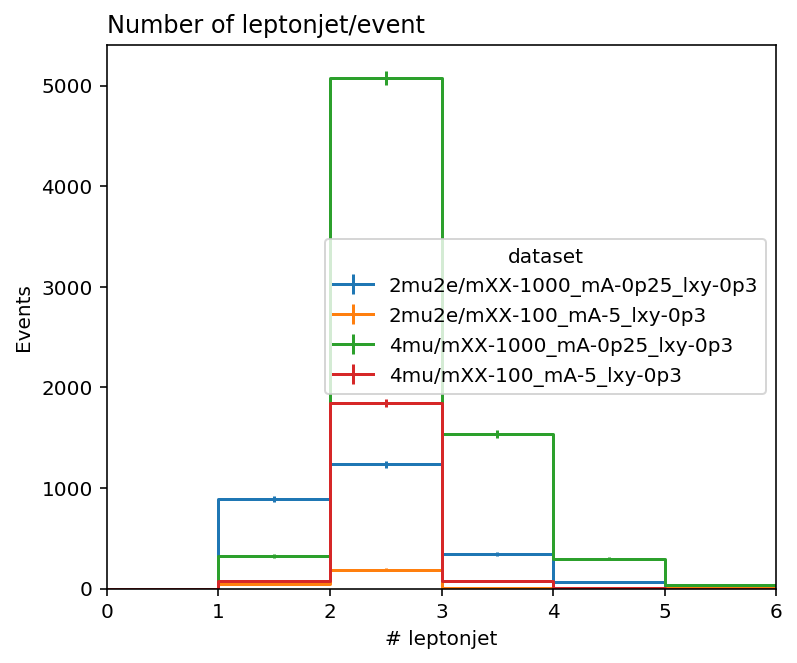

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=False)
ax.set_title('Number of leptonjet/event', x=0, ha='left');

In [26]:
dataset={
#     '4mu/mXX-100_mA-5_lxy-0p3': dataset4mu_['mXX-100_mA-5_lxy-0p3'],
#     '4mu/mXX-1000_mA-0p25_lxy-0p3': dataset4mu_['mXX-1000_mA-0p25_lxy-0p3'],
    '4mu/mXX-100_mA-5_lxy-300': dataset4mu_['mXX-100_mA-5_lxy-300'],
    '4mu/mXX-1000_mA-0p25_lxy-300': dataset4mu_['mXX-1000_mA-0p25_lxy-300'],
    
#     '2mu2e/mXX-100_mA-5_lxy-0p3': dataset2mu2e_['mXX-100_mA-5_lxy-0p3'],
#     '2mu2e/mXX-1000_mA-0p25_lxy-0p3': dataset2mu2e_['mXX-1000_mA-0p25_lxy-0p3'],
    '2mu2e/mXX-100_mA-5_lxy-300':dataset2mu2e_['mXX-100_mA-5_lxy-300'],
    '2mu2e/mXX-1000_mA-0p25_lxy-300': dataset2mu2e_['mXX-1000_mA-0p25_lxy-300'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:04<00:00,  4.99items/s]


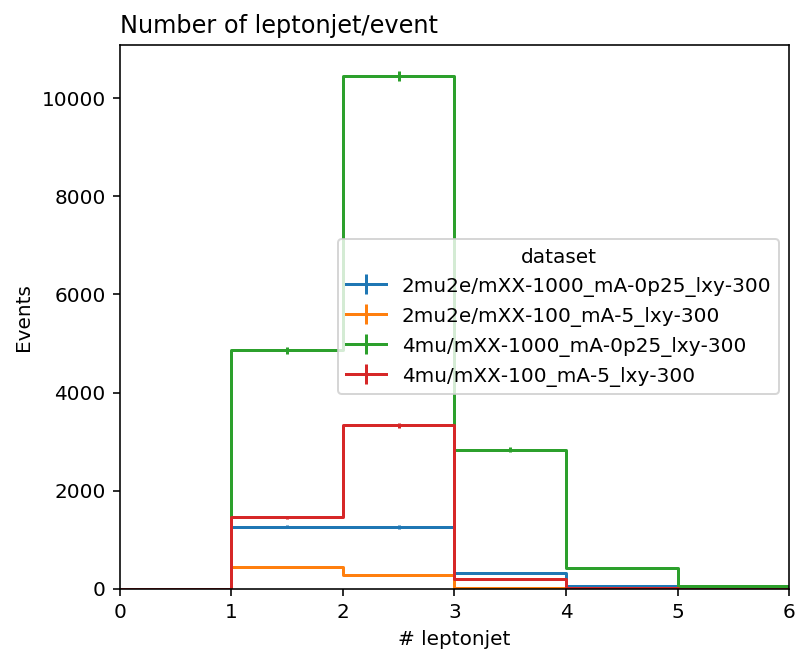

In [28]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=False)
ax.set_title('Number of leptonjet/event', x=0, ha='left');

In [40]:
dataset={'QCD_Pt-80to120': backgrounds_['QCD']['QCD_Pt-80to120']}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=leptonjetProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 127/127 [00:10<00:00, 12.65items/s]


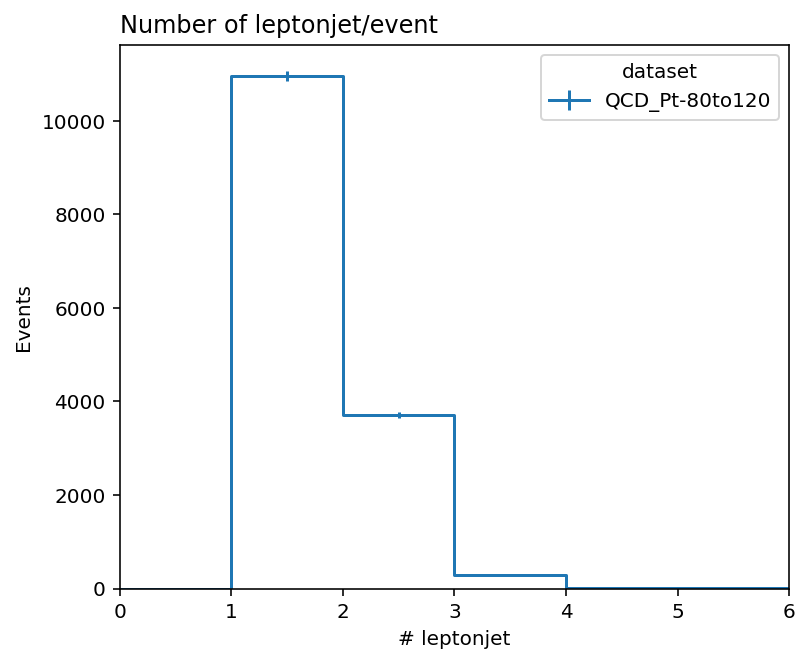

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
hist.plot1d(output['njet'], overlay='dataset', ax=ax, overflow='over', density=False)
ax.set_title('Number of leptonjet/event', x=0, ha='left');